<a href="https://colab.research.google.com/github/Nazneen-akram/coursera-rep/blob/main/adidas_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Load the dataset
file_path = '/content/Adidas US Sales Datasets.csv'
df = pd.read_csv(file_path, header=3, skiprows=[4])

In [4]:
# Check the structure and dimensions
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   9648 non-null   object
 1   Unnamed: 1   9648 non-null   int64 
 2   Unnamed: 2   9648 non-null   object
 3   Unnamed: 3   9648 non-null   object
 4   Unnamed: 4   9648 non-null   object
 5   Unnamed: 5   9648 non-null   object
 6   Unnamed: 6   9648 non-null   object
 7   Unnamed: 7   9648 non-null   object
 8   Unnamed: 8   9648 non-null   object
 9   Unnamed: 9   9648 non-null   object
 10  Unnamed: 10  9648 non-null   object
 11  Unnamed: 11  9648 non-null   object
 12  Unnamed: 12  9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


(9648, 13)

In [5]:
# Renaming the columns
column_names = ['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
                'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
                'Operating Profit', 'Operating Margin', 'Sales Method']
df.columns = column_names

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   object        
 8   Units Sold        9648 non-null   object        
 9   Total Sales       9648 non-null   int64         
 10  Operating Profit  9648 non-null   object        
 11  Operating Margin  9648 non-null   object        
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 980.0+ KB


In [13]:
# Summary statistics
df.describe()

,Retailer ID,Total Sales
count,9.648000e+03,9648.000000
mean,1.173850e+06,93273.437500
std,2.636038e+04,141916.016727
min,1.128299e+06,0.000000
25%,1.185732e+06,4254.500000
50%,1.185732e+06,9576.000000
75%,1.185732e+06,150000.000000
max,1.197831e+06,825000.000000


In [14]:
# Check for missing values
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [15]:
# Find and handle duplicates
print("Number of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

Number of duplicate rows: 0


## Sales Trends Analysis

In [6]:
# Convert 'Invoice Date' to datetime and 'Total Sales' to numeric after removing '$' and ','
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['Total Sales'] = pd.to_numeric(df['Total Sales'].replace('[\$,]', '', regex=True))

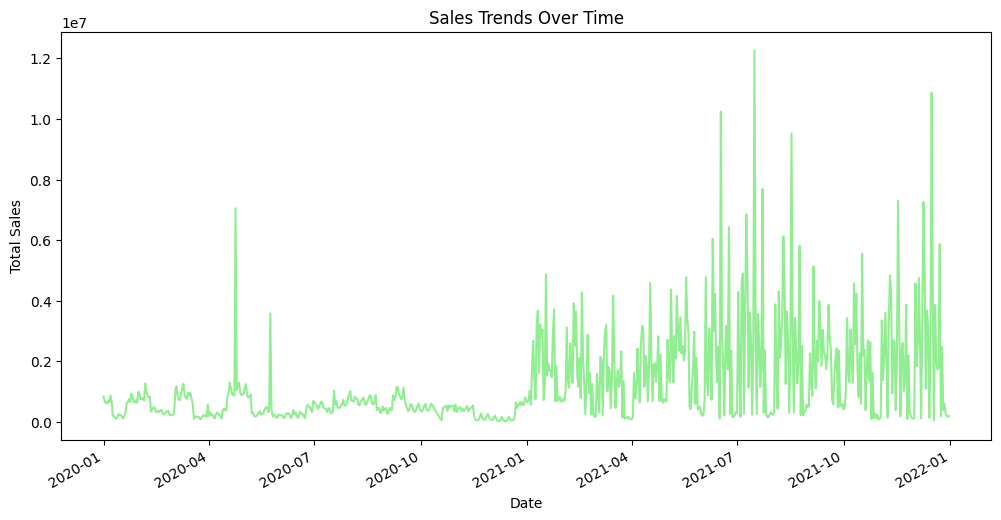

In [11]:
# Aggregate sales by date
sales_trends = df.groupby('Invoice Date')['Total Sales'].sum()

# Time series plot
plt.figure(figsize=(12, 6))
sales_trends.plot(kind='line', title='Sales Trends Over Time',color='lightgreen')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

## Sales Channel Analysis

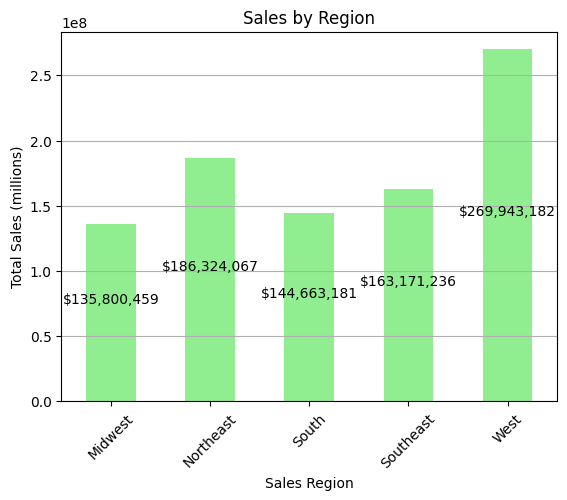

In [35]:
channel_sales = df.groupby('Region')['Total Sales'].sum()
ax = channel_sales.plot(kind='bar', title='Sales by Region', color='lightgreen')
plt.xlabel('Sales Region')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.grid(True,axis='y')

# Adding the value labels above each bar
for p in ax.patches:
  ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()/2),
      ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

##Highest Revenue and Growth by Sales Channels

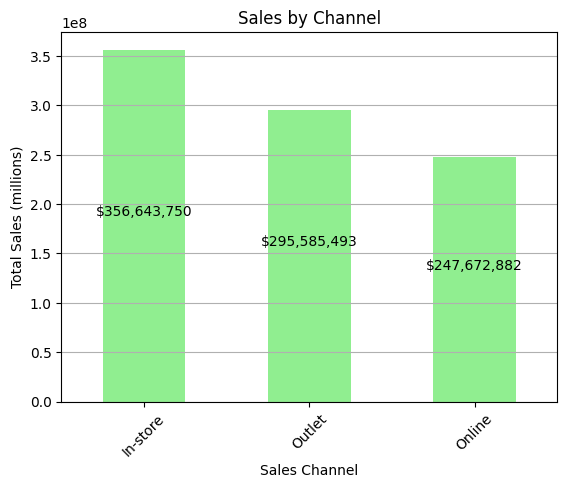

In [34]:
# Grouping by sales channel
sales_by_channel = df.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False)

ax = sales_by_channel.plot(kind='bar', title='Sales by Channel', color='lightgreen')
plt.xlabel('Sales Channel')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.grid(True,axis='y')

# Adding the value labels above each bar
for p in ax.patches:
  ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()/2),
      ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

##Cities Driving the Most Sales

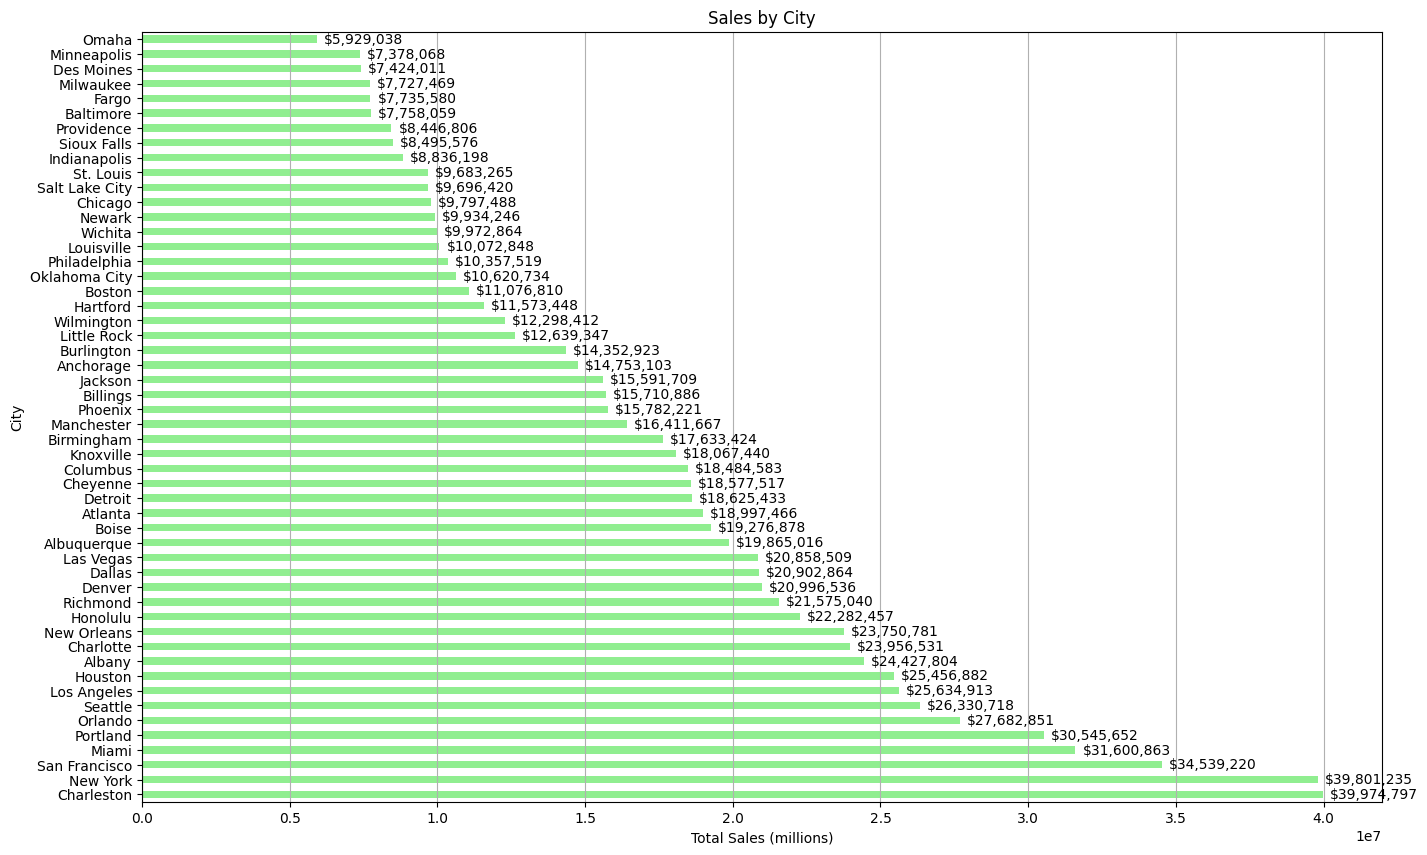

In [42]:
# Grouping by city
sales_by_city = df.groupby('City')['Total Sales'].sum().sort_values(ascending=False)

# Creating a horizontal bar plot
plt.figure(figsize=(16, 10))
ax = sales_by_city.plot(kind='barh', title='Sales by City', color='lightgreen')
plt.ylabel('City')
plt.xlabel('Total Sales (millions)')
plt.grid(True, axis='x')

# Adding the value labels next to each bar
for p in ax.patches:
    ax.annotate(f'${p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()


##Products Generating the Highest Sales Revenue

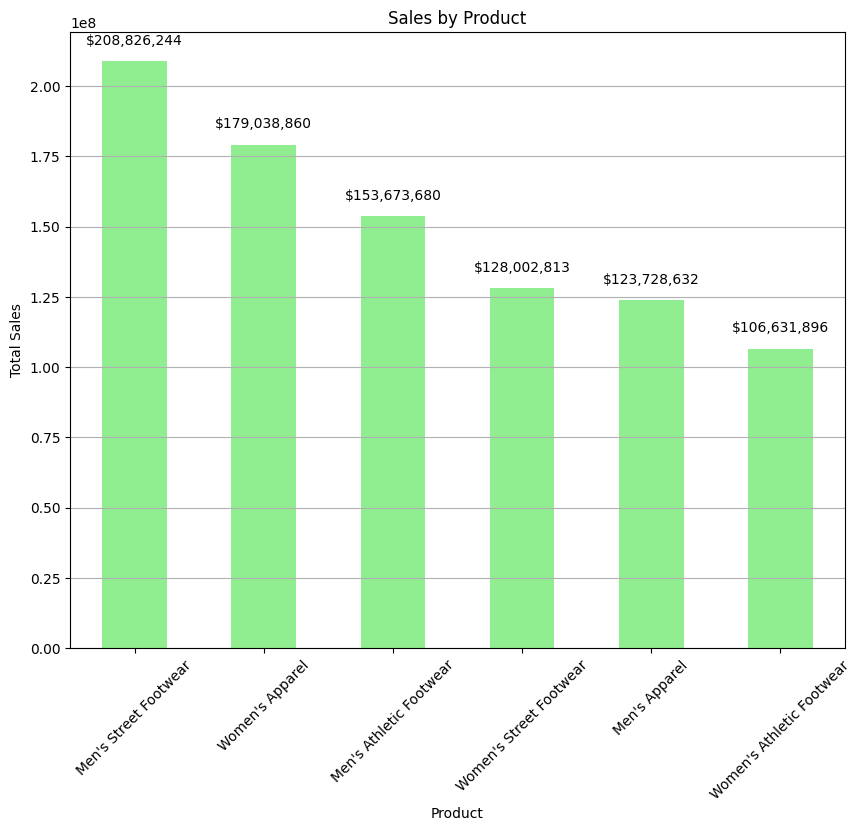

In [53]:
# Grouping by product
sales_by_product = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)

# Creating a vertical bar plot with a suitable figure size
plt.figure(figsize=(10, 8))  # Adjusted for better visualization
ax = sales_by_product.plot(kind='bar', title='Sales by Product', color='lightgreen')

# Setting the labels for the axes
plt.xlabel('Product')
plt.ylabel('Total Sales')

#rotate labels for better readability
plt.xticks(rotation=45)

# Enabling grid only for the y-axis
plt.grid(True, axis='y')

# Adding the value labels above each bar
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

plt.show()


##Months or Years with Highest and Lowest Sales Figures

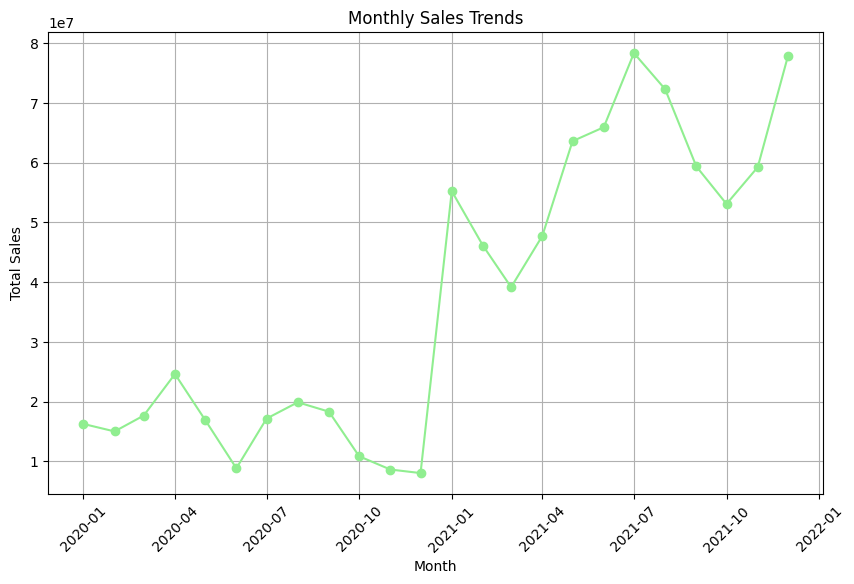

In [57]:
# Group by month and calculate total sales for each month
monthly_sales = df.groupby(df['Invoice Date'].dt.to_period('M'))['Total Sales'].sum()

# Convert the index (which is of type 'Period') to DateTime objects
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plot the sales trends over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [58]:
# Analyze the sales trends
diff = monthly_sales.diff()  # Calculate the difference between consecutive months
seasonality_threshold = 10000

# Check for seasonality
if (diff > seasonality_threshold).any():
    print("\nThese sales follow a seasonality.")
else:
    print("These sales do not follow a seasonality.")

# Check for trend
if (diff > 0).all() or (diff < 0).all():
    print("These sales follow a trend.")
else:
    print("\nThese sales do not follow a trend.")


These sales follow a seasonality.

These sales do not follow a trend.





> **Seasonal Sales Patterns:** Notably, there were consistent increases in sales during the months of April and December, traditionally aligned with the holiday season and potential promotional campaigns. Additionally, an increase in sales was observed in April 2020, and growth spikes occurred in January, July, and December 2021, indicating shifts in customer behavior during these months.


> **Insight:** Examining the monthly sales trends with consideration for seasonality aids in identifying periods of heightened sales activity and lulls. These trends can guide proactive strategies to capitalize on these high-demand periods and ensure sufficient resources are allocated to meet customer needs. This insight is instrumental in aligning marketing strategies, managing inventory effectively, and allocating resources optimally.





##seasonal decompose for time series decomposition and ARIMA used to implement the ARIMA (AutoRegressive Integrated Moving Average) model for time series forecasting

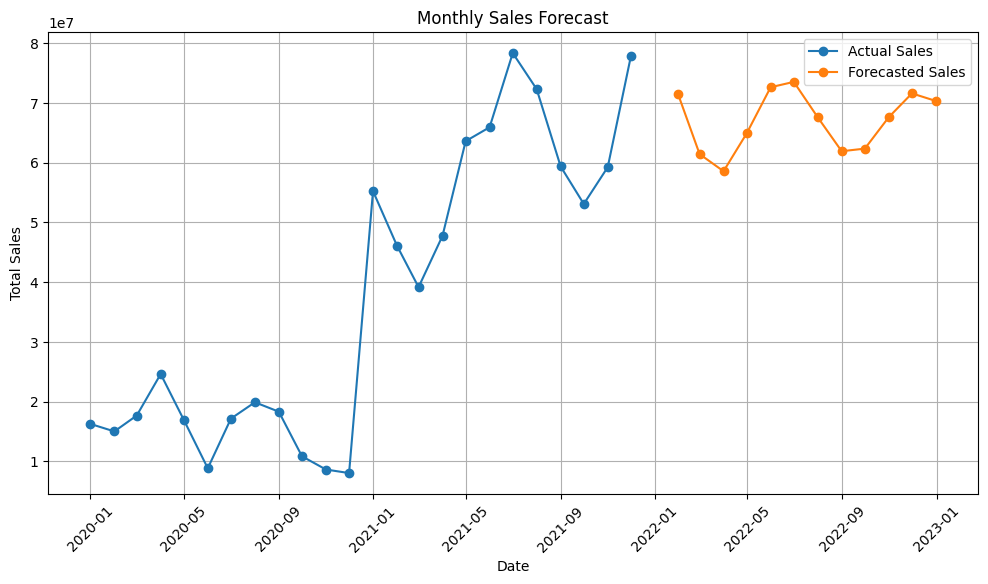

In [60]:
# Fit the ARIMA model to the data
model = ARIMA(monthly_sales, order=(2,1,2))  # Order: (p, d, q)
model_fit = model.fit()

# Make predictions for the next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

#Visualize the actual sales data and the forecasted values for the next months.

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', label='Actual Sales')
plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, marker='o', label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##RECOMMENDATIONS:

*   
Seasonal Campaigns: Launch targeted marketing campaigns during peak sales months to capitalize on heightened consumer interest.
*   Regional Customization: Tailor marketing approaches to specific high-performing regions to better resonate with local audiences.


*   Diversified Product Push: Devise strategies to promote accessory sales, potentially by bundling them with popular products or running special offers.
*   Innovation and Product Development: Continue investing in research and development to create innovative products that cater to evolving consumer preferences. Leveraging emerging technologies, such as sustainable materials and customization options, will further differentiate Adidas from competitors.


*   Enhanced Marketing Strategies: Develop targeted marketing campaigns that resonate with different consumer segments. Collaborations with influential athletes, celebrities, and brand ambassadors can amplify brand awareness and engagement. Additionally, leveraging social media platforms and influence marketing will help reach younger demographics.
*   Omnichannel Strategy: Strengthen the integration of online and offline channels to provide a seamless shopping experience. Implement click-and-collect options, leverage augmented reality for virtual try-on, and offer personalized recommendations to enhance customer engagement across all touch points.


*   Sustainability Initiatives: Accelerate sustainability efforts by incorporating eco-friendly materials, reducing carbon footprint, and promoting circular economy practices. Communicate these initiatives effectively to align with the growing consumer demand for environmentally responsible brands.








